# Laboratorul 2

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

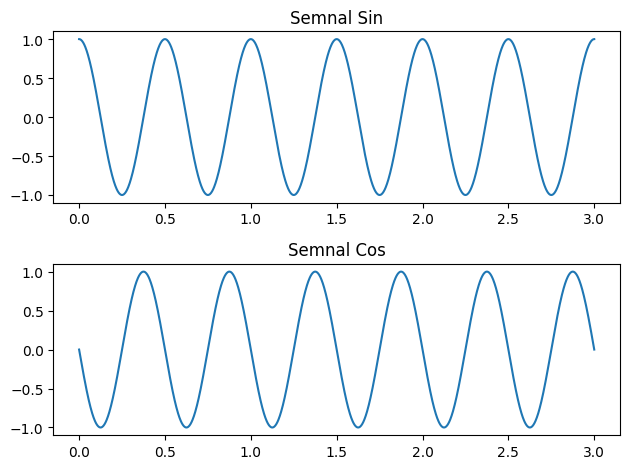

In [8]:
# voi alege
# amplitudine = 1
# frecventa = 2

faza = np.pi / 2  # o faza arbitrara

t = np.linspace(0, 3, 1500)  # interval de timp de la 0 la 3 secunde cu 1500 de esantioane
semnal_sin = np.sin(2 * np.pi * 2 * t + faza) # 2 este frecventa aleasa de mine
semnal_cos = np.cos(2 * np.pi * 2 * t + faza)

plt.subplot(211)
plt.plot(t, semnal_sin)
plt.title('Semnal Sin')

plt.subplot(212)
plt.plot(t, semnal_cos)
plt.title('Semnal Cos')

plt.tight_layout()  # sa nu se suprapuna
plt.show()

## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

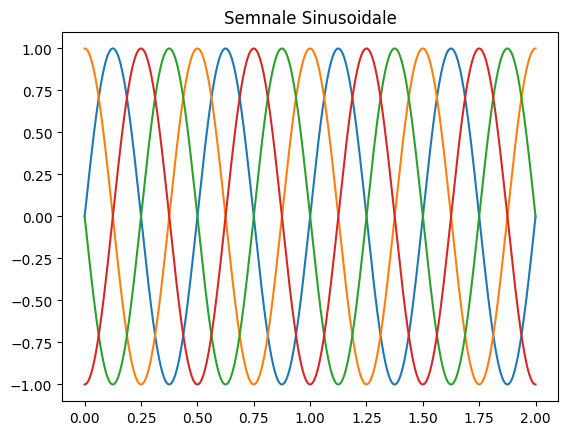

In [9]:
# pt rezolvarea exercitiului am ales frecventa = 2

t = np.linspace(0, 2, 1000) # interval de timp de la 0 la 2 secunde cu 1000 de esantioane
faze = [0, np.pi / 2, np.pi ,3 * np.pi / 2] # am creat o lista cu cele 4 faze pe care le voi folosi

for faza in faze: # am parcurs vectorul de faze pentru a le afisa pe toate pe acelasi grafic
    semnal_sin = np.sin(2 * np.pi * 2 * t + faza)
    plt.plot(t, semnal_sin)

plt.title('Semnale Sinusoidale')
plt.show()

## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

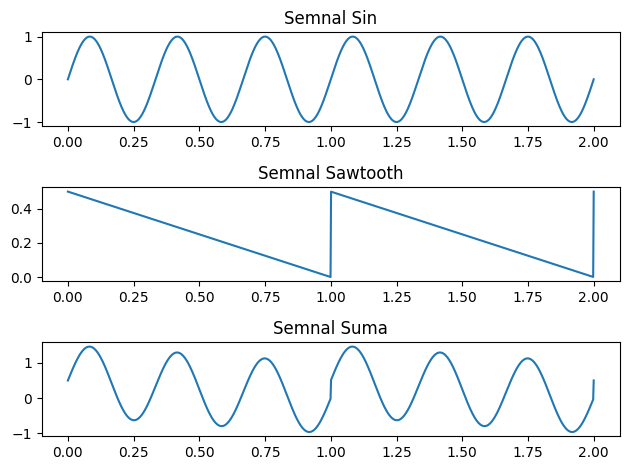

In [20]:
t = np.linspace(0, 2, 1000) # interval de timp de la 0 la 2 secunde cu 1000 de esantioane

semnal_sinus = np.sin(2 * np.pi * 3 * t)  # frecventa = 3 Hz
semnal_sawtooth = 0.5 * (1 - np.mod(t, 1))  # frecventa = 1 Hz

suma = semnal_sinus + semnal_sawtooth


# Afișare semnal sinusoidal
plt.subplot(311)
plt.plot(t, semnal_sinus)
plt.title('Semnal Sin')

# Afișare semnal de tip sawtooth
plt.subplot(312)
plt.plot(t, semnal_sawtooth)
plt.title('Semnal Sawtooth')

# Afișare suma celor două semnale
plt.subplot(313)
plt.plot(t, suma)
plt.title('Semnal Suma')

plt.tight_layout()
plt.show()

## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [32]:
frecventa = 44100
durata = 1
nr_esantioane = int(durata * frecventa)

frecventa_1 = 440 
frecventa_2 = 1760  

t = np.linspace(0, durata, nr_esantioane)

semnal_1 = np.sin(2 * np.pi * frecventa_1 * t)
semnal_2 = np.sin(2 * np.pi * frecventa_2 * t)


semnal_concat = np.concatenate((semnal_1, semnal_2))

rate = int(frecventa)
scipy.io.wavfile.write('semnal_concat.wav', rate, semnal_concat)

sounddevice.play(semnal_concat, frecventa)
sounddevice.wait()



## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 400 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

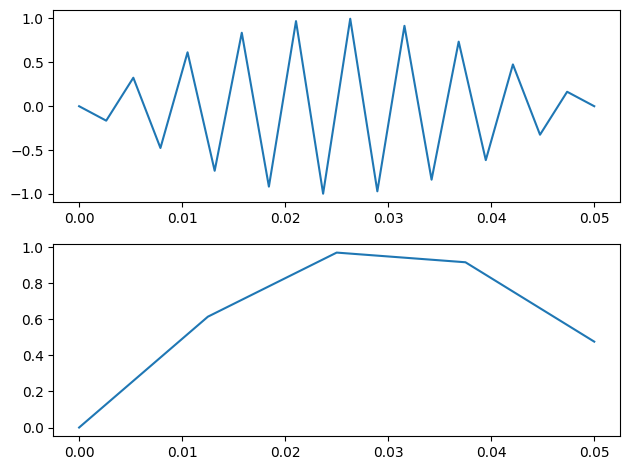

In [49]:
frecventa = 200  
frecventa_es_init = 400
frecventa_es_deci = frecventa_es_init
durata = 0.05

t_init = np.linspace(0, durata, int(durata * frecventa_es_init))
semnal_init = np.sin(2 * np.pi * frecventa * t_init)
semnal_deci = semnal_init[::4]
t_deci = np.linspace(0, durata, len(semnal_deci))

plt.subplot(211)
plt.plot(t_init, semnal_init)

plt.subplot(212)
plt.plot(t_deci, semnal_deci)

plt.tight_layout()
plt.show()

2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

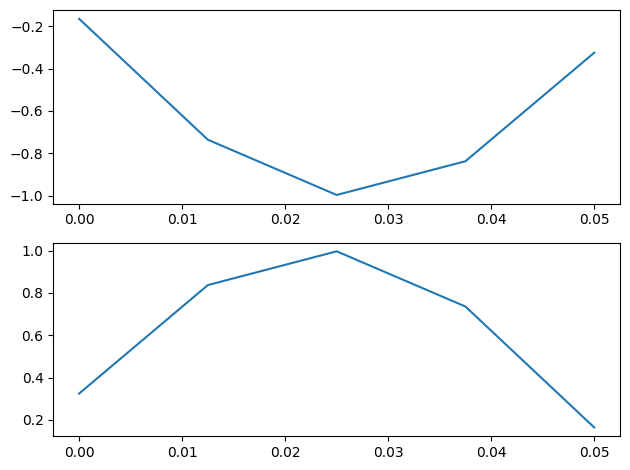

In [48]:
frecventa = 200 
frecventa_es_init = 400 
frecventa_es_deci = frecventa_es_init
durata = 0.05 

t_init = np.linspace(0, durata, int(durata * frecventa_es_init))
semnal_init = np.sin(2 * np.pi * frecventa * t_init)
semnal_deci_2 = semnal_init[1::4]
semnal_deci_3 = semnal_init[2::4]
t_deci = np.linspace(0, durata, len(semnal_deci_2))

plt.subplot(211)
plt.plot(t_deci, semnal_deci_2)


plt.subplot(212)
plt.plot(t_deci, semnal_deci_3)

plt.tight_layout()
plt.show()

## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

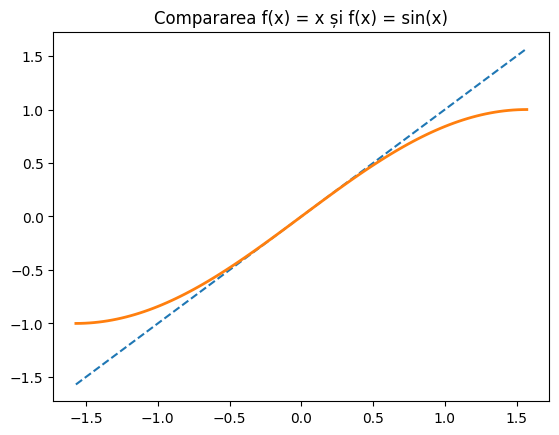

In [45]:
x = np.linspace(-np.pi/2, np.pi/2, 100)
f_x = x
f_sin_x = np.sin(x)

plt.plot(x, f_x, linestyle='--')
plt.plot(x, f_sin_x, linewidth=2)
plt.title('Compararea f(x) = x și f(x) = sin(x)')
plt.show()